In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_sets/cybersecurity_attacks.csv')

In [3]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [4]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
# checking for missing values and sorting by the columns with higest missing values
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

In [6]:
# for imputing missing values
df['Alerts/Warnings'].unique()

array([nan, 'Alert Triggered'], dtype=object)

In [7]:
def impute(x):
    if x == 'Alert Triggered':
        return 'yes'
    else:
        return 'no'

df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(impute)

In [8]:
df['Alerts/Warnings'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
df['IDS/IPS Alerts'].unique()

array([nan, 'Alert Data'], dtype=object)

In [10]:
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [11]:
# checking
df['IDS/IPS Alerts'].unique()

array(['No Data', 'Alert Data'], dtype=object)

In [12]:
# checking for unique values in each column
print(df['Malware Indicators'].unique())
print(df['Proxy Information'].unique())
print(df['Firewall Logs'].unique())

['IoC Detected' nan]
['150.9.97.135' nan '114.133.48.179' ... '60.51.30.46' '137.76.130.8'
 '112.169.115.139']
['Log Data' nan]


In [13]:
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'Not Detected' if pd.isna(x) else x) # imputing missing in malware indicators
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No Proxy' if pd.isna(x) else x) # imputing missing in proxy info
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Logs' if pd.isna(x) else x) # imputing missing in Firewall logs

In [14]:
df.isnull().sum() # checking for all the nan values if there any

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [15]:
# checking for duplicates
df.duplicated().sum()

0

In [16]:
df['Device Information'].unique()

array(['Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.2; Trident/5.0)',
       'Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0)',
       'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.2; Trident/5.0)',
       ...,
       'Mozilla/5.0 (Windows; U; Windows NT 4.0) AppleWebKit/533.2.3 (KHTML, like Gecko) Version/4.0.3 Safari/533.2.3',
       'Mozilla/5.0 (X11; Linux i686) AppleWebKit/536.2 (KHTML, like Gecko) Chrome/15.0.852.0 Safari/536.2',
       'Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like Mac OS X; tg-TJ) AppleWebKit/534.33.5 (KHTML, like Gecko) Version/4.0.5 Mobile/8B116 Safari/6534.33.5'],
      dtype=object)

In [17]:
df['Device Information'].nunique()

32104

In [18]:
import re
patterns = [r'Windows',r'Linux',r'Android',r'iPad',r'iPod',r'iPhone',r'Macintosh',]

def extract_os_info(user_agent_info):
    for pattern in patterns:
        match = re.search(pattern, user_agent_info, re.I) # re.I makes the search case Insensisitive
        if match:
            return match.group()
    return 'Unknown'

In [19]:
df['Device/OS'] = df['Device Information'].apply(extract_os_info)

In [20]:
df.drop('Device Information', axis=1) # removing not needed column

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Device/OS
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,Windows
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Segment B,"Bilaspur, Nagaland",No Proxy,Log Data,No Data,Firewall,Windows
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,Windows
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Segment B,"Jaunpur, Rajasthan",No Proxy,No Logs,Alert Data,Firewall,Macintosh
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Segment C,"Anantapur, Tripura",149.6.110.119,No Logs,Alert Data,Firewall,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Segment A,"Nashik, Manipur",No Proxy,Log Data,Alert Data,Firewall,iPad
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,No Data,Firewall,Windows
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Segment C,"Mahbubnagar, Himachal Pradesh",No Proxy,Log Data,Alert Data,Server,Windows
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,No Data,Server,Linux


In [21]:
# Group by 'Device/OS' and count the number of attacks
device_counts = df['Device/OS'].value_counts()

In [22]:
device_counts

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

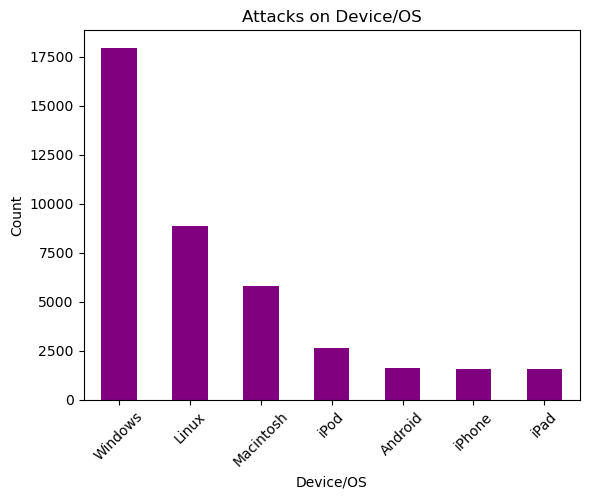

In [23]:
device_counts.plot(kind='bar', color='purple')
plt.xlabel("Device/OS")
plt.ylabel("Count")
plt.title("Attacks on Device/OS")
plt.xticks(rotation=45)
plt.show()

In [24]:
print(df['Severity Level'].unique())
print(df['Attack Type'].unique())

['Low' 'Medium' 'High']
['Malware' 'DDoS' 'Intrusion']


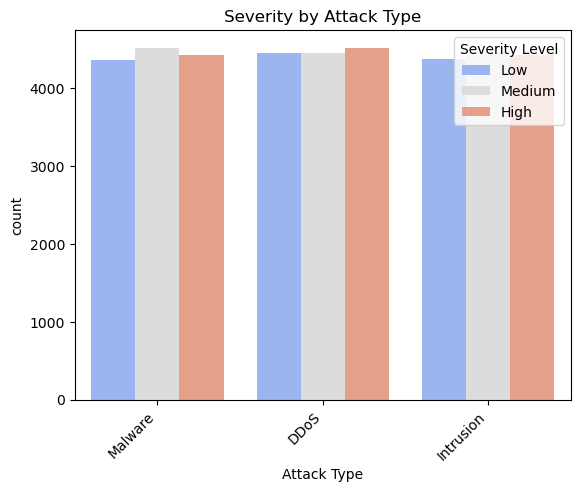

In [25]:
# Visualizing how severe it is according to Attack Type
sns.countplot(data=df, x="Attack Type", hue='Severity Level', palette='coolwarm')
plt.title('Severity by Attack Type')
plt.xlabel('Attack Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
count_of_attacks = df['Attack Type'].value_counts().reset_index()
count_of_attacks

,Attack Type,count
0,DDoS,13428
1,Malware,13307
2,Intrusion,13265


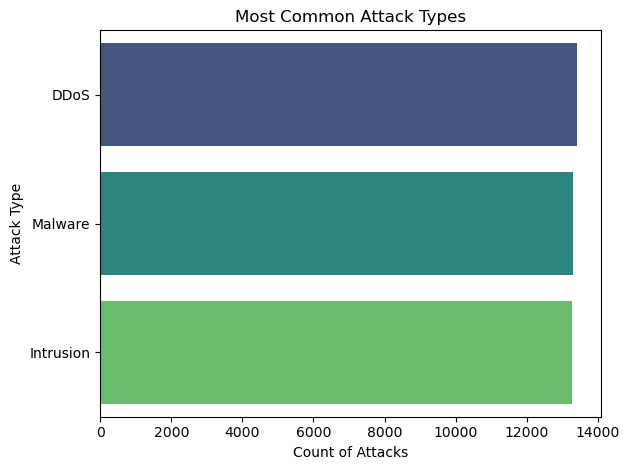

In [27]:
# Plotting the top attack types
sns.barplot(x='count', y='Attack Type', hue='Attack Type', data=count_of_attacks, palette='viridis', dodge=False)
plt.xlabel('Count of Attacks')
plt.ylabel('Attack Type')
plt.title('Most Common Attack Types')
plt.tight_layout()
plt.show()

In [29]:
# top ten source of attacks by geography
top_ten_df = df['Geo-location Data'].value_counts()
geo_top_ten = pd.DataFrame(top_ten_df).reset_index()
geo_top_ten.head(10)

,Geo-location Data,count
0,"Ghaziabad, Meghalaya",16
1,"Kalyan-Dombivli, Jharkhand",15
2,"Ghaziabad, Uttarakhand",14
3,"Ghaziabad, Tripura",14
4,"Kottayam, Nagaland",13
5,"Srikakulam, Uttarakhand",13
6,"Aurangabad, Nagaland",13
7,"Yamunanagar, Arunachal Pradesh",13
8,"Motihari, Odisha",13
9,"Amroha, Sikkim",13


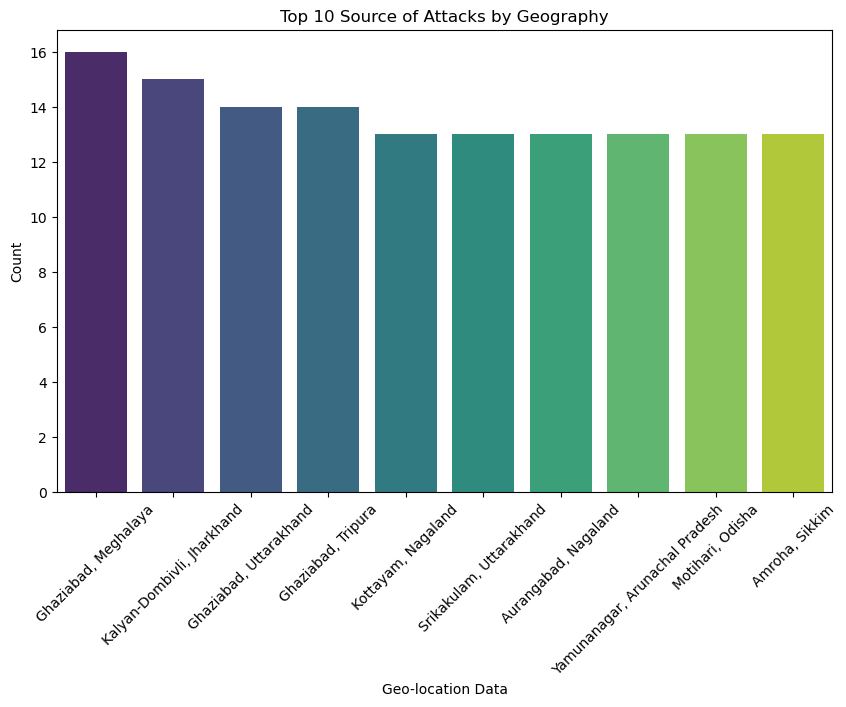

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=geo_top_ten.head(10), x='Geo-location Data', y='count',hue='Geo-location Data', palette='viridis')
plt.title('Top 10 Source of Attacks by Geography')
plt.xticks(rotation=45)
plt.xlabel('Geo-location Data')
plt.ylabel('Count')
plt.show()

In [42]:
# calculating attacks on ports
top_ports = df['Destination Port'].value_counts()
top_ports = pd.DataFrame(top_ports).reset_index().head(10)
top_ports.columns = ['Destination Port', 'count']
top_ports

,Destination Port,count
0,34117,6
1,7508,6
2,30804,5
3,37248,5
4,57508,5
5,56672,5
6,38787,5
7,36756,5
8,25889,5
9,39887,5


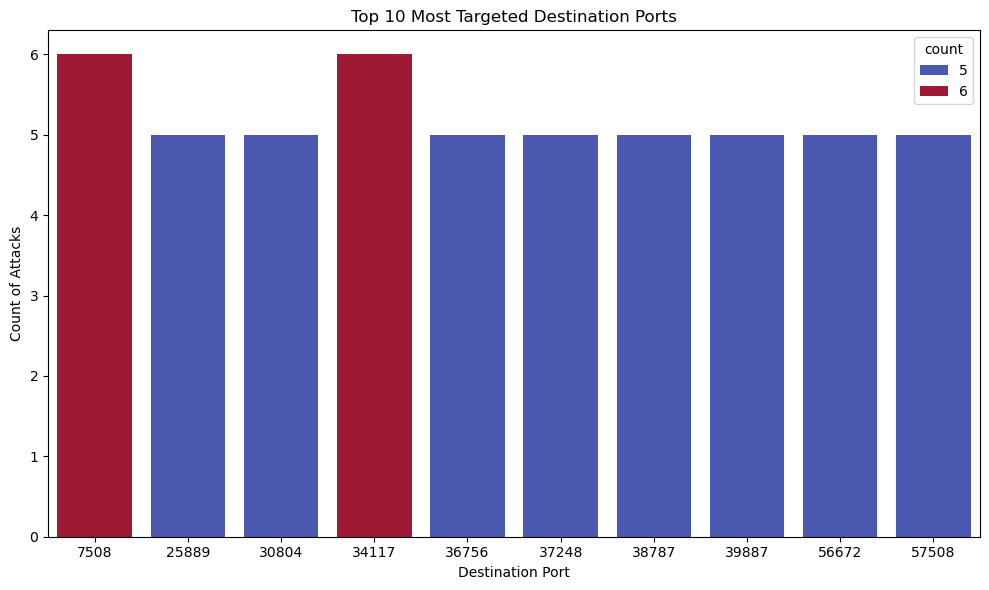

In [43]:
# Plotting the top destination ports
plt.figure(figsize=(10, 6))
sns.barplot(x='Destination Port', y='count', hue='count', data=top_ports, palette='coolwarm', dodge=False)
plt.xlabel('Destination Port')
plt.ylabel('Count of Attacks')
plt.title('Top 10 Most Targeted Destination Ports')
plt.tight_layout()
plt.show()

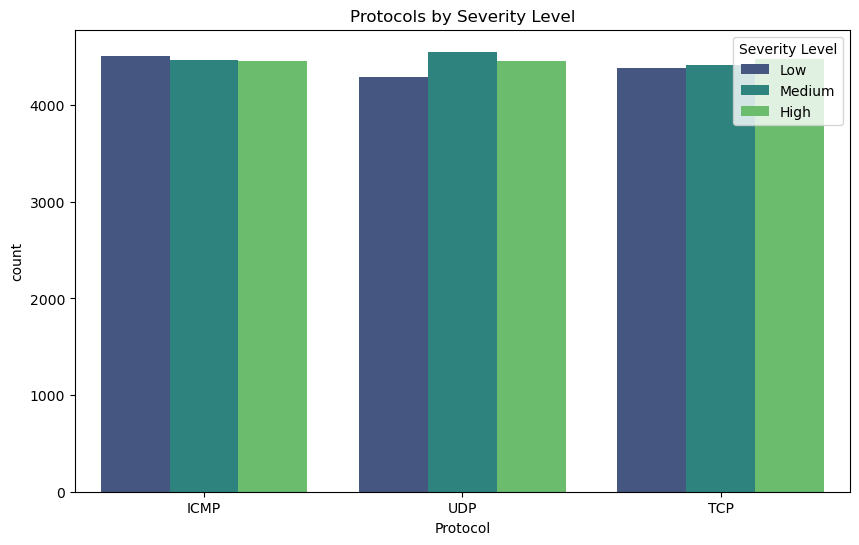

In [48]:
# plotting protocols by severity level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Protocol', hue='Severity Level', palette='viridis')
plt.title('Protocols by Severity Level')
plt.xlabel('Protocol')
plt.ylabel('count')
plt.show()

In [51]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Months'] = df['Timestamp'].dt.month

month_counts = df['Months'].value_counts()
month_counts = pd.DataFrame(month_counts).reset_index()
month_counts.columns = ['Month', 'count']
sorted_month_counts = month_counts.sort_values(by='Month')
sorted_month_counts

,Month,count
7,1,3378
8,2,3232
0,3,3678
6,4,3421
4,5,3595
3,6,3609
1,7,3623
2,8,3615
5,9,3482
9,10,2989


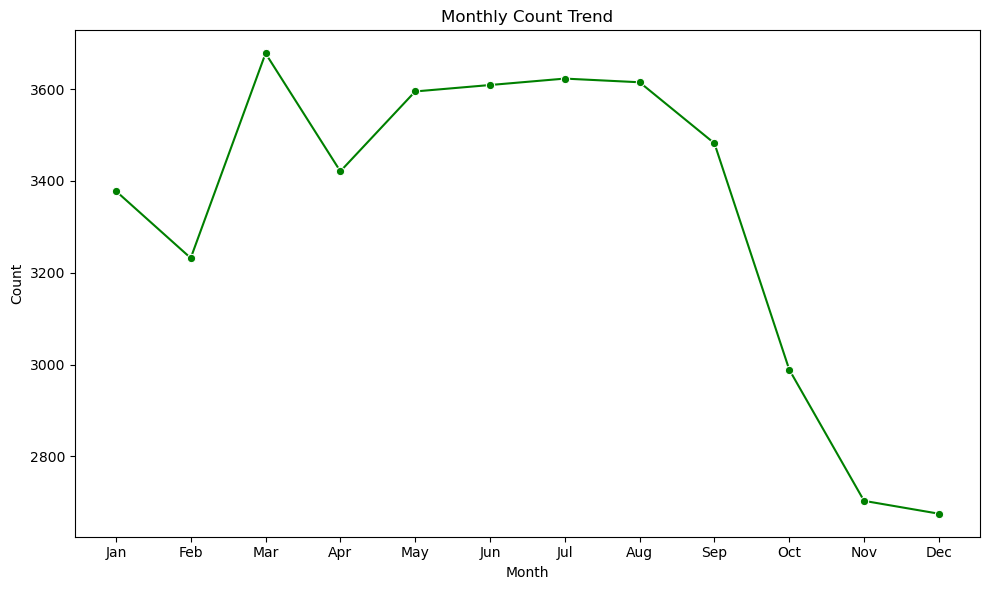

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_month_counts, x='Month', y='count', marker='o', color='green')

plt.title('Monthly Count Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=sorted_month_counts['Month'], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()